<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Mixture_of_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

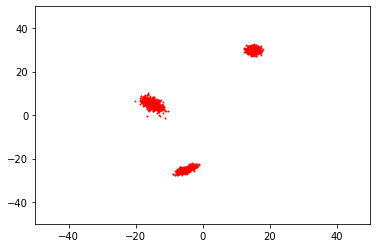

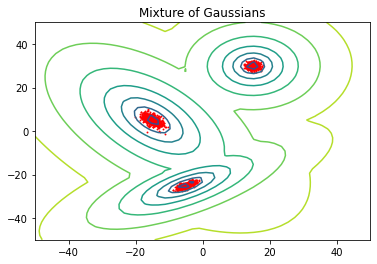

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples=600
np.random.seed(0)
shifted_gaussian=np.random.randn(n_samples,2)+np.array([15,30])
C1=np.array([[0.,-0.7],[1.5,.7]])
streched_gaussian1=np.dot(np.random.randn(n_samples,2),C1)+np.array([-5,-25])
C2=np.array([[0.5,-1.7],[-1.5,0.5]])
streched_gaussian2=np.dot(np.random.randn(n_samples,2),C2)+np.array([-15,5])
X_train=np.vstack([shifted_gaussian,streched_gaussian1,streched_gaussian2])
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.scatter(X_train[:,0],X_train[:,1],.8,color='r')
plt.show()
clt=mixture.GaussianMixture(n_components=3,covariance_type='full')
clt.fit(X_train)
x=np.linspace(-50.,50.)
y=np.linspace(-50.,50.)
X,Y=np.meshgrid(x,y)
XX=np.array([X.ravel(),Y.ravel()]).T
Z=-clt.score_samples(XX)
Z=Z.reshape(X.shape)

plt.contour(X,Y,Z,norm=LogNorm(vmin=1.0,vmax=1000.0),levels=np.logspace(0,3,10))
plt.scatter(X_train[:,0],X_train[:,1],.8,color='r')
plt.title('Mixture of Gaussians')
plt.show()